In [1]:

import lasio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
las = lasio.read('S-KNGM-GM-3_T_133820_0 (2).las')
data = las.df()

In [8]:
print(data.head())

features = ['GR', 'LLS', 'CALI', 'DT', 'LLD', 'MSFL' , 'NPHI', 'RHOB' ,'SP']  
X = data[features]


                CALI  DT  GR  LLD  LLS  MSFL  NPHI  RHOB  SP  Facies  \
BOREHOLE-DEPTH                                                         
15.0830          NaN NaN NaN  NaN  NaN   NaN   NaN   NaN NaN       2   
15.2354          NaN NaN NaN  NaN  NaN   NaN   NaN   NaN NaN       2   
15.3878          NaN NaN NaN  NaN  NaN   NaN   NaN   NaN NaN       2   
15.5402          NaN NaN NaN  NaN  NaN   NaN   NaN   NaN NaN       2   
15.6926          NaN NaN NaN  NaN  NaN   NaN   NaN   NaN NaN       2   

                        PCA1          PCA2  
BOREHOLE-DEPTH                              
15.0830        -4.389412e-16  4.136283e-15  
15.2354        -4.199967e-16 -2.659946e-14  
15.3878        -2.277891e-16  5.768284e-16  
15.5402        -1.804170e-16  3.609042e-16  
15.6926        -2.700777e-16  5.767466e-17  


In [17]:
X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

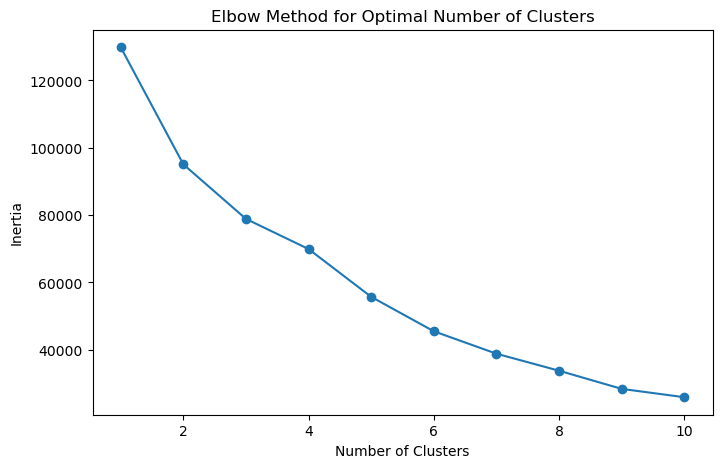

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List to store the inertia values for each k
inertia = []

# Loop over a range of cluster numbers from 1 to 10
for k in range(1, 11):
    # Explicitly set n_init to 10 to suppress the warning
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

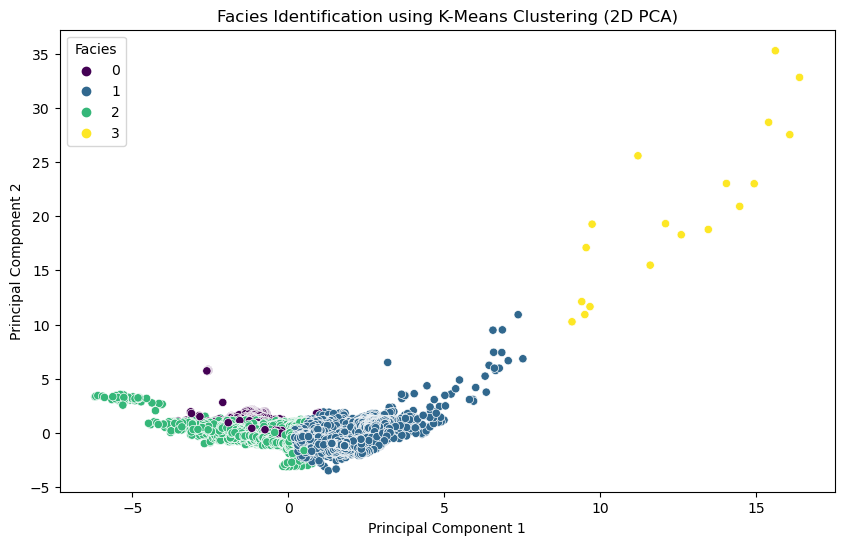

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_scaled and data are already defined and preprocessed

# Set the number of clusters
optimal_clusters = 4

# Instantiate KMeans with explicit n_init value to suppress the warning
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)

# Fit KMeans and predict facies clusters
data['Facies'] = kmeans.fit_predict(X_scaled)

# Perform PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the DataFrame
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

# Plot the PCA components with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Facies', palette='viridis', data=data)
plt.title('Facies Identification using K-Means Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Facies')
plt.show()



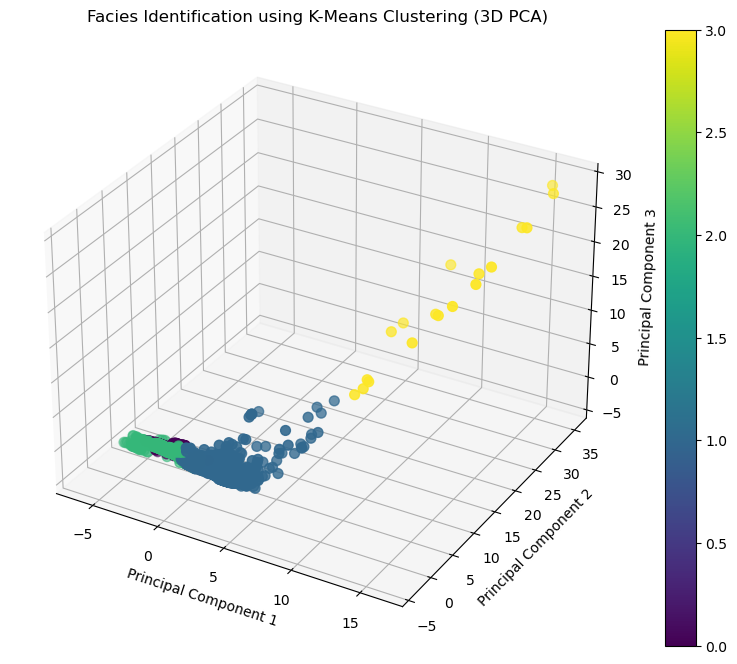

In [16]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=data['Facies'], cmap='viridis', s=50)
plt.title('Facies Identification using K-Means Clustering (3D PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc)
plt.show()